# Основы машинного обучения (ИАД)
## НИУ ВШЭ, 2021-2022 учебный год

### Домашнее задание №8

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_squared_error
from tqdm import tqdm

# Бустинг

## Градиентный бустинг своими руками (3 + 2* баллов)

Реализуйте алгоритм градиентного бустинга для регрессии. Напомним **основные формулы**.

Обозначим текущую композицию на $N-1$ шаге за $a_{N - 1}(x_i)$. Следующий базовый алгоритм $b_N(x_i)$ обучается на ответах $-\frac{\partial L(y_i, z)}{\partial z}\Bigl|_{z = a_{N - 1}(x_i)}$, где $L(y_i, z)$ — значение функции потерь на объекте при правильном ответе $y_i$ и предсказании $z$. Композиция на следующем шаге получается следующим образом:

$$
a_N(x_i) = a_{N-1}(x_i) + \nu\gamma_Nb_N(x_i)
$$

Здесь $\nu$ — гиперпараметр learning rate, $\gamma_N$ — оптимальный вес, настраиваемый на каждом шаге алгоритма, который можно найти по следующей формуле (обратите внимание на отсутствие $\nu$):

$$
\gamma_N = \mathrm{arg}\min_\gamma \frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a_{N - 1}(x_i) + \gamma b_N(x_i)\right)
$$

Можете принять $\gamma_N = 1$ для каждого $N$.

> Реализуйте нахождение оптимального $\gamma_N$ на каждом шаге, чтобы получить ещё 1 балл.


В качестве функции потерь возьмите **MSE**.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn` и методы оптимизации из различных библиотек.*

In [2]:
# это может помочь вам для поиска оптимальных gamma
from scipy.optimize import minimize

In [49]:
class GradientBoosting:
    def __init__(self, n_estimators, max_depth, learning_rate=0.1, gamma_0 = 1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        # your code here
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.gamma_0 = gamma_0
        self.trees = []
        self.gamma = []
        
    def fit(self, x, y):
        """
        INPUT:
        x - np.array of shape (k, d)
        y - np.array of shape (k,)
        """
        # Здесь нам нужно проитерироваться по n_estimators и обучить
        # соответствующее количество деревьев с помощью _fit_predict_tree(),
        # правильно обновляя y_new
        # Деревья нужно где-то сохранить, чтобы затем использовать в predict()
        # your code here
        y_new = np.zeros(y.shape)
        if self.gamma_0 == 0:
            for _ in range(self.n_estimators):
                y_new += self.learning_rate * self.find_best_gamma(y_new, x, y)
        else:
            for _ in range(self.n_estimators):
                y_new += self.learning_rate * self._fit_predict_tree(x, y - y_new)
# оптимальный шагррр
    def find_best_gamma(self, y_old, x, y_true):
        b = self._fit_predict_tree(x, y_true - y_old)
        gamma = minimize(lambda z: mean_squared_error(y_true - y_old, z * b), 0.5).x
        self.gamma.append(*gamma)
        return gamma * b

    def _fit_predict_tree(self, x, y):
        # Обучаем дерево и возвращаем его предикшн
        tree = DecisionTreeRegressor(max_depth=self.max_depth)
        tree.fit(x, y)
        self.trees.append(tree)
        return tree.predict(x)
        
    def predict(self, x):
        """
        INPUT:
        x - np.array of shape (m, d)
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        # Используем сохранённые деревья для расчёта агрегированного предикшна
        # your code here
        y_pred = np.zeros(x.shape[0])
        if self.gamma_0 == 0:
            for i in range(self.n_estimators):
                y_pred += self.trees[i].predict(x) * self.gamma[i] * self.learning_rate
        else:
            for i in range(self.n_estimators):
                y_pred += self.trees[i].predict(x) * self.learning_rate
        return y_pred
    def gamma_(self):
        return self.gamma
        # выдаст нам параметры
    def params(self):
        return {"n_estimators":self.n_estimators, 
                "max_depth":self.max_depth, 
                "learning_rate":self.learning_rate,
                "op_gamma":self.gamma_0}
    

Проверьте вашу реализацию на Boston dataset. 

> Подберите оптимальные гиперпараметры, чтобы победить RandomForestRegressor как в обычном случае, так и при нахождении оптимального шага **(не меняйте параметры сида)**. При необходимости воспользуйтесь GridSearch. За это вы получите ещё 1 балл.



In [50]:
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

/Users/kirill/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [218]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=4, n_estimators=640, random_state=19052019)

rf.fit(X_train, y_train)
mean_squared_error(y_test, rf.predict(X_test))

9.63198271791959

In [53]:
np.random.seed(19052019)

# your code here
n_est = np.arange(5, 200, 10)
max_d= np.arange(4,12,1)
lr = np.arange(0.05, 1.1, 0.05)
mse_0 = np.inf
for i in tqdm(n_est):
    for j in max_d:
        for k in lr:
            gb = GradientBoosting(i, j, k, gamma_0 = 0)
            gb.fit(X_train, y_train)
            mse = mean_squared_error(y_test, gb.predict(X_test))
            if mse < mse_0:
                mse_0 = mse
                dict = gb.params()

100%|██████████| 20/20 [17:21<00:00, 52.08s/it]


In [55]:
print(dict, mse_0)

{'n_estimators': 45, 'max_depth': 8, 'learning_rate': 0.6500000000000001, 'op_gamma': 0} 8.964150324195286


In [ ]:
n_est = np.arange(5, 200, 10)
max_d= np.arange(4,12,1)
lr = np.arange(0.05, 1.1, 0.05)
mse_0 = np.inf
for i in tqdm(n_est):
    for j in max_d:
        for k in lr:
            gb = GradientBoosting(i, j, k, gamma_0 = 1)
            gb.fit(X_train, y_train)
            mse = mean_squared_error(y_test, gb.predict(X_test))
            if mse < mse_0:
                mse_0 = mse
                dict = gb.params()

100%|██████████| 20/20 [06:38<00:00, 19.94s/it]


In [ ]:
print(dict, mse_0)

{'n_estimators': 95, 'max_depth': 10, 'learning_rate': 0.6000000000000001, 'op_gamma': 1} 9.189638916175129


Для удобства проверяющего укажите, пожалуйста, реализовали ли вы нахождение оптимального шага?

- Да 


## Прогнозируем задержки самолётов (2 балла)

Поработаем с задачей про задержки самолётов. На основании доступных данных о рейсе вам нужно определить, будет ли он задержан на 15 минут.
Воспользуйтесь любыми методами градиентного бустинга {`XGboost`, `catboost`, `LightGBM`} и `GridSearchCV` для достижения результата.

> Получите 1 балл за преодоление порога roc_auc_score 0.72 и ещё 1 балл за преодоление порога 0.74.



In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering-data/flight_delays_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering-data/flight_delays_test.csv')

In [77]:
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [3]:
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

In [20]:
# Референс

X_train = train[['Distance', 'DepTime']].values
y_train = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_test = test[['Distance', 'DepTime']].values
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)

xgb = XGBClassifier()
xgb.fit(X_train_part, y_train_part)
roc_auc_score(y_valid, xgb.predict_proba(X_valid)[:, 1])

0.6999527484205217

In [79]:
train["DayOfWeek"] = train["DayOfWeek"].map(lambda x: "DW" + x)
train["Origin"] = train["Origin"].map(lambda x: "O" + x)
train["Dest"] = train["Dest"].map(lambda x: "D" + x)
train["DayofMonth"] = train["DayofMonth"].map(lambda x: "DM" + x)
# поменял признаки, а то они слишком похожи

In [80]:
y_train = train["dep_delayed_15min"].map({"Y": 1, "N": 0}).values
train = train.drop("dep_delayed_15min", axis = 1)
features = ["Month", "DayofMonth",	"DayOfWeek", "DepTime", "UniqueCarrier","Origin","Dest"]
train  = pd.get_dummies(train[features])
train


,DepTime,Month_c-1,Month_c-10,Month_c-11,Month_c-12,Month_c-2,Month_c-3,Month_c-4,Month_c-5,Month_c-6,...,Dest_DTYS,Dest_DVCT,Dest_DVIS,Dest_DVLD,Dest_DVPS,Dest_DWRG,Dest_DWYS,Dest_DXNA,Dest_DYAK,Dest_DYUM
0,1934,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1548,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1422,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1015,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1828,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1618,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
99996,804,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,1901,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,1515,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
X_train = train.values
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)

In [82]:
xgb = XGBClassifier()
xgb.fit(X_train_part, y_train_part)
roc_auc_score(y_valid, xgb.predict_proba(X_valid)[:, 1])

0.7438635861873582

In [83]:
cat = CatBoostClassifier(silent=True, iterations=4500)
cat.fit(X_train_part, y_train_part)
roc_auc_score(y_valid, cat.predict_proba(X_valid)[:,1])

0.7491257943658942

# Кластеризация

## DBSCAN своими руками (3 + 2* баллов)


```
DBSCAN: Density-based spatial clustering of applications with noise
```


Реализуйте класс dbscan.

Алгоритм имеет два основных гиперпараметра:
1. `eps` &mdash; радиус рассматриваемой окрестности
2. `min_samples` &mdash; число соседей в окрестности

Для выполнения кластеризации DBSCAN точки делятся на основные точки, достижимые по плотности точки и выпадающие следующим образом:

- Точка $p$ является основной точкой, если по меньшей мере `min_samples` точек находятся на расстоянии, не превосходящем 
`eps` от неё. Говорят, что эти точки достижимы прямо из $p$.

-  Точка $q$ прямо достижима из $p$, если точка $q$ находится на расстоянии, не большем `eps`, от точки $p$, и $p$ — основная точка.
Точка $q$ достижима из $p$, если имеется путь 
$p_1,…,p_n$ где $p_1=p$ и $p_n=q$ , а каждая точка $p_{i+1}$ достижима прямо из $p_i$ (все точки на пути должны быть основными, за исключением $q$).

Все точки, не достижимые из основных точек, считаются выбросами.

Теперь, если $p$ является основной точкой, то она формирует кластер вместе со всеми точками (основными или неосновными), достижимыми из этой точки. Каждый кластер содержит по меньшей мере одну основную точку. Неосновные точки могут быть частью кластера, но они формируют его «край», поскольку не могут быть использованы для достижения других точек.


In [6]:
class dbscan:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples 

        
    def fit_predict(self, X):
        n_obj = X.shape[0]
        n_fe = X.shape[1]
       # найдем расстояния для точек, в векторной форме
        X_2 = np.tile(X, n_obj)
        X_dist = X_2.reshape(n_obj, n_obj, n_fe) - X
        self.distance = np.linalg.norm(X_dist, axis = -1)
        self.clusters = np.full(X.shape[0], None)
        num = 1
        for i in range(X.shape[0]):
            if self.clusters[i] == None:  
                self.grow_cluster(num, i)
                num += 1
        # Вынесем шум в отдельный класс
        cl, temp = np.unique(self.clusters, return_counts = True)
        for i in cl[temp  == 1]:
            self.clusters[self.clusters == i] = 0
        
        return self.clusters
        


    def grow_cluster(self, root, neighbours):
        # В этой функции мы полностью строим кластер относительно переданной точки
        # Т.е. реализуем цикл по структуре данных, изначально состоящей из уже
        # известных соседей (neighbours) и в процессе пополняющейся
        self.clusters[neighbours] = root
        group = np.where([(self.distance[neighbours] < self.eps)])[1]
        if group.shape[0] >= self.min_samples:
            for i in group:   
                if self.clusters[i] == None:
                    self.grow_cluster(root, i)

        

Проверим себя на простом примере:

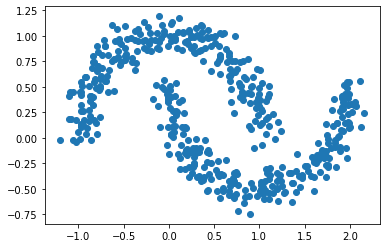

In [4]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd

X, _ = make_moons(n_samples=500, noise=0.1)
plt.scatter(X[:,0], X[:,1])
plt.show()

Кластеризуйте это с помощью своей версии DBSCAN:

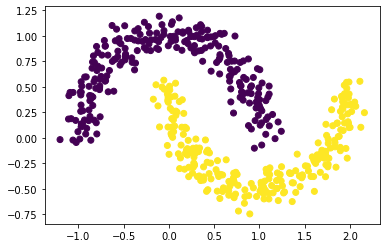

In [7]:
clusters = dbscan(eps=0.2, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

Референс:

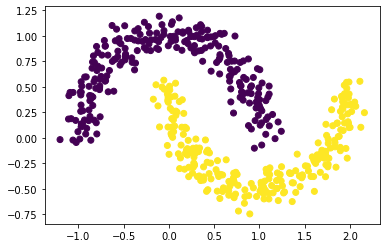

In [8]:
from sklearn.cluster import DBSCAN

clusters = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()


> Получите 1 балл за ещё один интересный пример кластеризации (в качестве референса используйте предоставленное изображение. Нужно несколько интересных соседствующих форм):



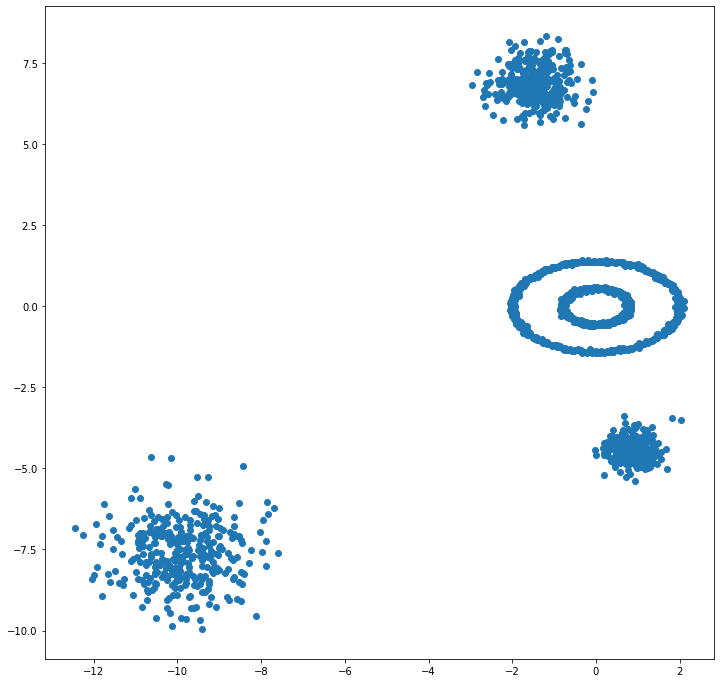

In [8]:
# your code here
from sklearn.datasets import make_blobs, make_circles
plt.figure(figsize=(12,12))
blobs, *_ = make_blobs(n_samples=1000,
                             cluster_std=[0.3, 0.5, 0.9],
                             random_state=100)
circles, _ = make_circles(n_samples=1000, factor=.4,
                                      noise=.02)
                                    
circles[:, 0] *= 2
circles[:, 1] *= 1.4                                  
X = np.vstack((blobs,circles))
plt.scatter(X[:,0], X[:,1])

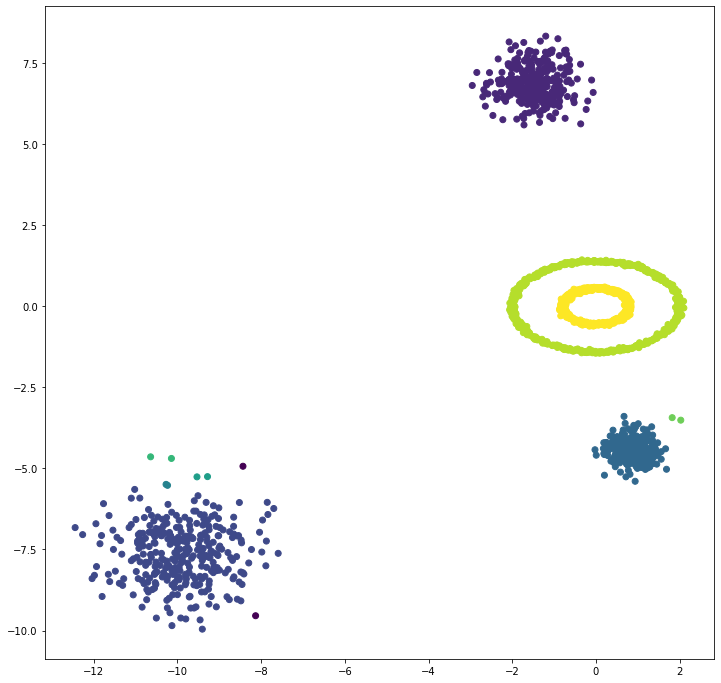

In [9]:
plt.figure(figsize=(12,12))
clusters = DBSCAN(eps=0.5, min_samples=2).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=clusters)


> Получите ещё 1 балл, если время работы вашего алгоритма больше референсного не более чем в 100 раз с учётом погрешности 3% от вашего времени:



In [21]:
%%time
%%capture
clusters = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

CPU times: user 14.6 ms, sys: 2.41 ms, total: 17 ms
Wall time: 15.3 ms


In [22]:
%%time
%%capture
clusters = dbscan(eps=0.2, min_samples=10).fit_predict(X)

CPU times: user 186 ms, sys: 17.9 ms, total: 203 ms
Wall time: 207 ms


## Применяем DBSCAN (3 балла)

__[1.5 балла]__ Возьмите колонки `Distance` и `DepTime` (из датасета о задержках самолётов). Запустите на тренировочной выборке на них DBSCAN. Нарисуйте облоко рассеивания с получившимися кластерами. Насколько много их вышло? 

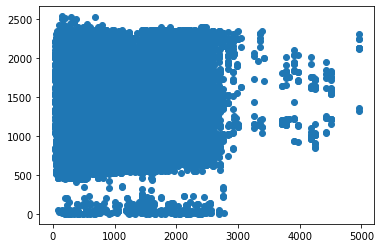

In [9]:
X_train = train[['Distance', 'DepTime']].values
X_test = test[['Distance', 'DepTime']].values
X_train
plt.scatter(X_train[:,0], X_train[:,1])

Что это за кошмар?


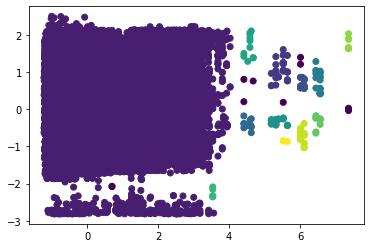

(13,)


In [10]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
clusters = DBSCAN(eps=0.3, min_samples=3).fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=clusters)
plt.show()
print(np.unique(clusters).shape)

после масштабирования стало все хорошо

Попробуйте перебрать параметры `eps` и `min_samples` по решётке и нарисовать для каждой пары облако рассеивания. При каких параметрах шумовых точек оказывается больше всего? Почему так происходит? 

__Ответ:__ 

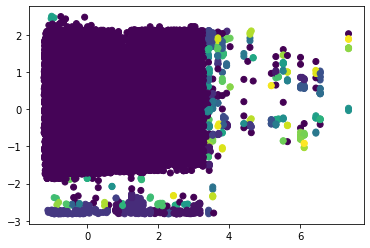

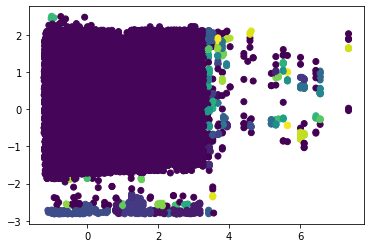

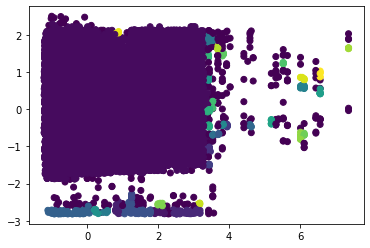

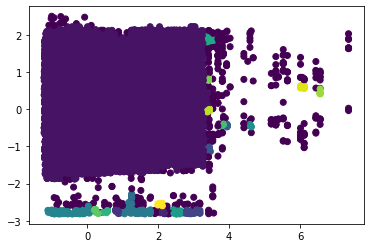

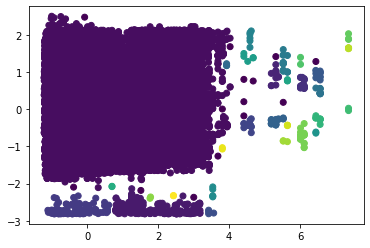

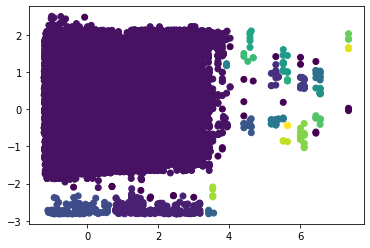

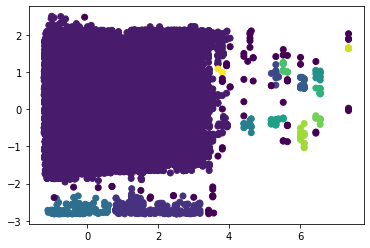

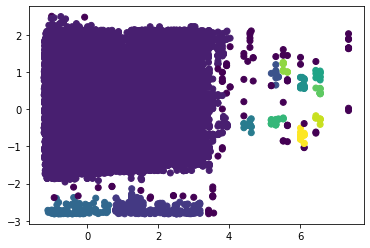

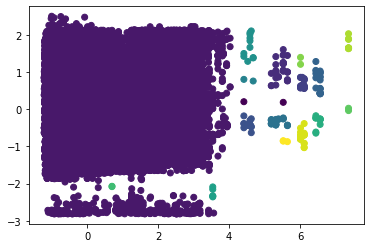

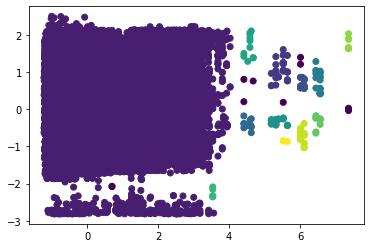

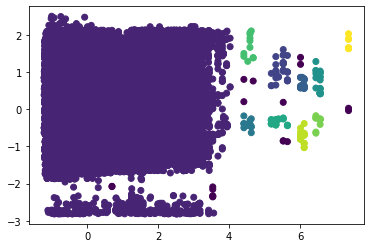

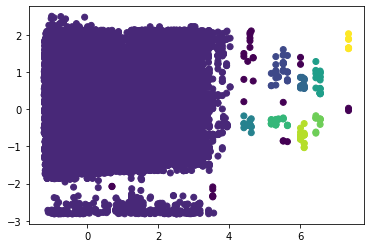

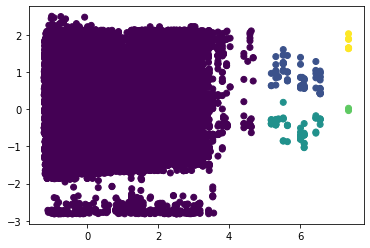

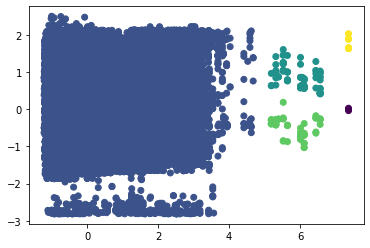

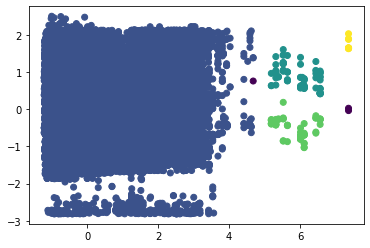

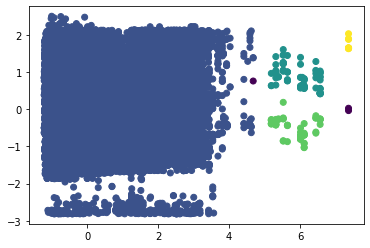

In [11]:
eps = [0.1, 0.2, 0.3, 0.5]
min_samples = [2,3,6,8]
for z in eps:
    for var in min_samples:
        clusters = DBSCAN(eps=z, min_samples=var).fit_predict(X_train)
        plt.scatter(X_train[:,0], X_train[:,1], c=clusters)
        
        plt.show()


Хорошо получилось для 3 с конца то есть eps = 0.5 соседей 3,связано с тем, что точки находятся по кучкам довольно далеко друг от друга, при миеньшем  eps просто будет лоибо меньше кластеров, либл больше шума, также точки по кучкам в маленьком количесвте, плэтому много sample ставить нет смысла

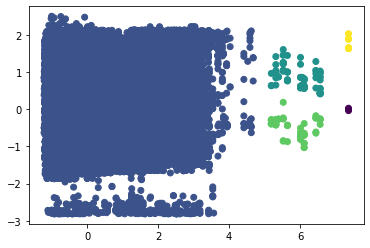

In [11]:
clusters = DBSCAN(eps=0.5, min_samples=3).fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=clusters)
plt.show()

__[1.5 балла]__ Добавьте в датасет новую категориальную переменную: номер кластера из DBSCAN и обучите Catboost со своими лучшими гиперпараметрами. Улучшилось ли качество модели на тестовой выборке? Как думаете, почему? 

In [21]:
# your code here  ¯\_(ツ)_/¯
X_train = train[['Distance', 'DepTime']]
y_train = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)
X_train_part[['Distance', 'DepTime']] = scalar.fit_transform(X_train_part[['Distance', 'DepTime']])
X_valid[['Distance', 'DepTime']] = scalar.transform(X_valid[['Distance', 'DepTime']])
clusters_train = DBSCAN(eps=0.5, min_samples=3).fit_predict(X_train_part)
X_train_part['cluster'] = clusters_train
clusters_valid = DBSCAN(eps=0.5, min_samples=3).fit_predict(X_valid)
X_valid['cluster'] = clusters_valid

In [22]:
cat = CatBoostClassifier(silent=True, iterations=4500)
cat.fit(X_train_part, y_train_part)
roc_auc_score(y_valid, cat.predict_proba(X_valid)[:,1])

0.7034611004865203

Результат улучшился но не намного, по идеи должен был довольно хорошо, так как добавился новый достаточно хороший признак, который делит обьекты по классам

__Ответ:__

# Небольшие подарочки

**+0.1 балла** за фотографию того, как вы проводите лето на открытом воздухе


<a href="https://ibb.co/x8bKbzt"><img src="https://i.ibb.co/LhyDy9X/leto.png" alt="leto" border="0" /></a>

**+0.1 балла** за смешной мем по машинному обучению

<a href="https://imgbb.com/"><img src="https://i.ibb.co/JRX2JdV/dany.jpg" alt="dany" border="0" /></a>

**+0.1 балла** за развернутый отзыв о курсе: ваших впечатлениях, сложностях и радостях, любимых темах и т.д.

Было круто, по-моему один из немногих курсов, которые у меня были, где +- все понятно, нет такого, что вообще ничего не понимаешь, есть готовый рецепт как все сделать, к сожалению, я выгорел из-за многих других факторов и на отличные оценки мне было все равно, тем не менеее делать было интересно и пропускать ничего не хотелось